In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oil = pd.read_csv('oil.csv', parse_dates=True, index_col='date')

In [3]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [4]:
oil.isna().sum()

dcoilwtico    43
dtype: int64

In [5]:
len(oil['dcoilwtico'])

1218

In [6]:
print('Data Loss: ', (43/1218)*100, end='%')

Data Loss:  3.5303776683087027%

In [7]:
oil.dropna(inplace=True)

<Axes: xlabel='date'>

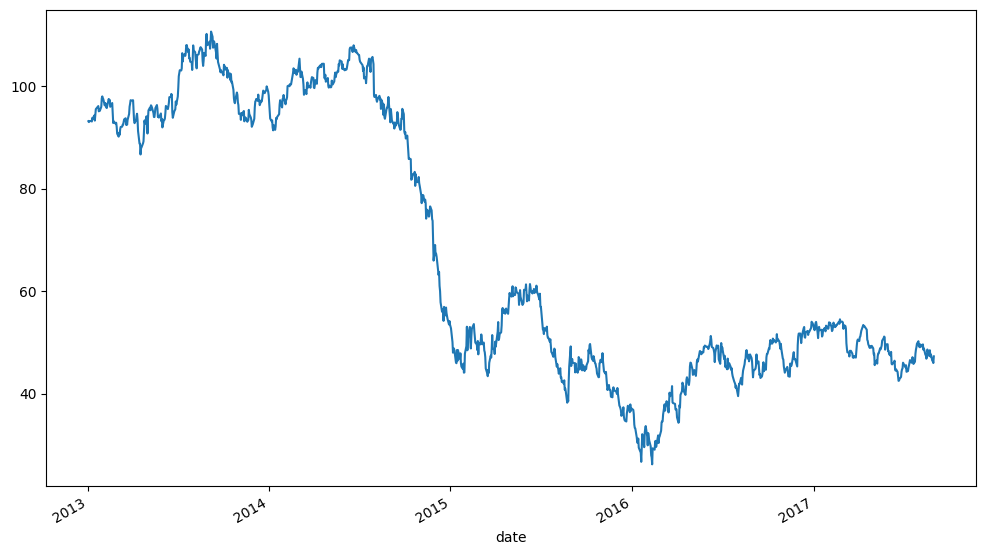

In [8]:
oil['dcoilwtico'].plot(figsize=(12, 7))

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(oil['dcoilwtico'], autolag='AIC')

(-0.8771776701964078,
 0.7953952087184236,
 1,
 1173,
 {'1%': -3.435937099783359,
  '5%': -2.864007125872554,
  '10%': -2.5680835504811657},
 3748.673557033254)

In [11]:
oil['log_vals'] = np.log(oil['dcoilwtico'])

In [12]:
adfuller(oil['log_vals'], autolag='AIC')

(-1.0798866043916124,
 0.7230258882604785,
 1,
 1173,
 {'1%': -3.435937099783359,
  '5%': -2.864007125872554,
  '10%': -2.5680835504811657},
 -5432.854148954826)

In [13]:
oil['first_shift'] = oil['dcoilwtico'].shift(1)

In [14]:
adfuller(oil['first_shift'].dropna(), autolag='AIC')

(-0.851161814882184,
 0.8036300327899962,
 1,
 1172,
 {'1%': -3.4359418774356696,
  '5%': -2.864009233598981,
  '10%': -2.5680846730014326},
 3745.329359251131)

In [15]:
oil['log_first_shift'] = oil['log_vals'].shift(1)

In [16]:
adfuller(oil['log_first_shift'].dropna(), autolag='AIC')

(-1.0512043967379934,
 0.7341338824526695,
 1,
 1172,
 {'1%': -3.4359418774356696,
  '5%': -2.864009233598981,
  '10%': -2.5680846730014326},
 -5428.568294628746)

In [17]:
oil['first_shift_diff'] = oil['dcoilwtico']-oil['first_shift']

In [18]:
adfuller(oil['first_shift_diff'].dropna(), autolag='AIC')

(-36.396148176858176,
 0.0,
 0,
 1173,
 {'1%': -3.435937099783359,
  '5%': -2.864007125872554,
  '10%': -2.5680835504811657},
 3745.4063487626263)

<Axes: xlabel='date'>

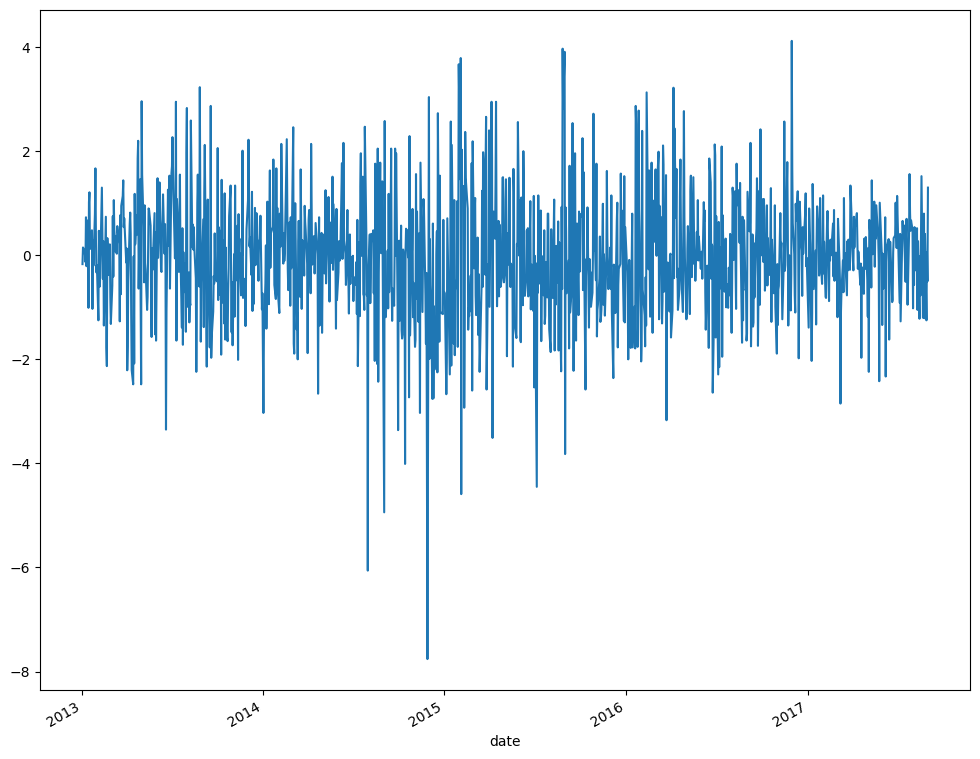

In [19]:
oil['first_shift_diff'].plot(figsize=(12, 10))

In [20]:
len(oil['first_shift_diff'].dropna())

1174

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

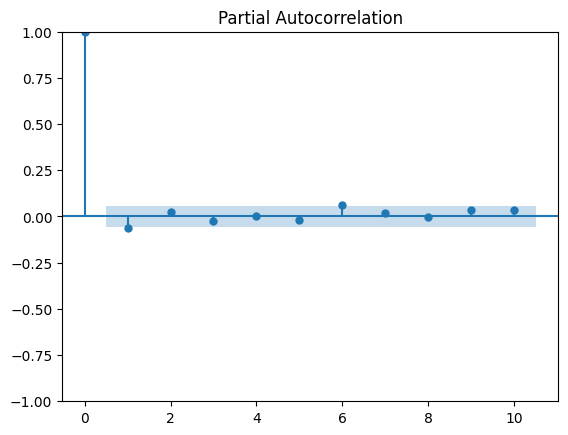

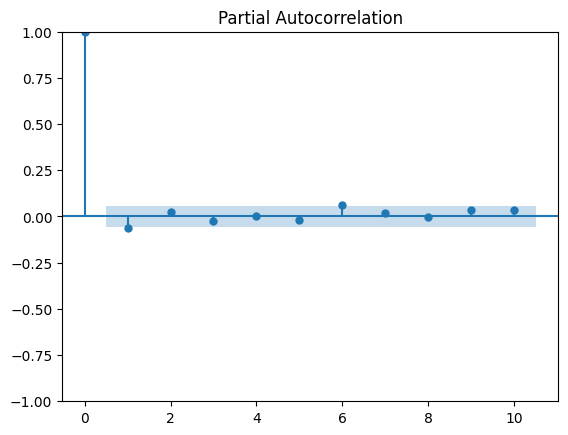

In [22]:
plot_pacf(oil['first_shift_diff'].dropna(), lags=10)

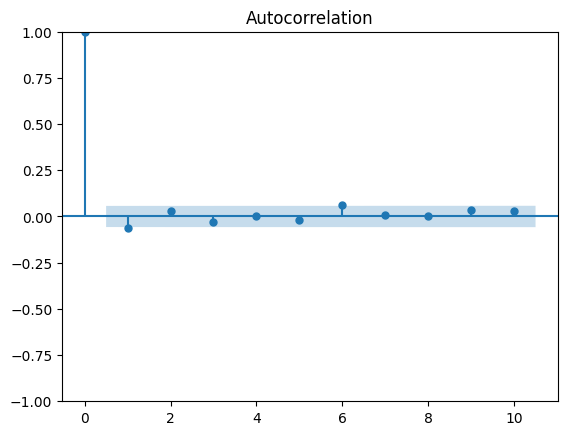

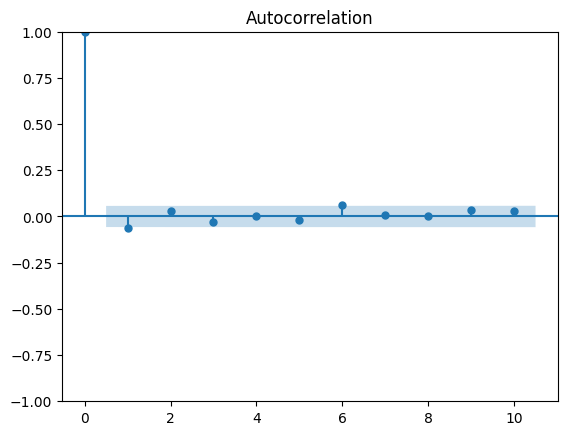

In [23]:
plot_acf(oil['first_shift_diff'].dropna(), lags=10)

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(oil['dcoilwtico'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             dcoilwtico   No. Observations:                 1175
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1901.298
Date:                Fri, 20 Oct 2023   AIC                           3808.597
Time:                        09:05:37   BIC                           3823.801
Sample:                             0   HQIC                          3814.330
                               - 1175                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7070      0.193     -3.656      0.000      -1.086      -0.328
ma.L1          0.6547      0.206      3.182      0.001       0.251       1.058
sigma2         1.4935      0.042     35.218      0.000       1.410       1.577
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               261.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.29
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model_fit.predict()

date
2013-01-02     0.000000
2013-01-03    93.139992
2013-01-04    92.979506
2013-01-07    93.105714
2013-01-08    93.205106
                ...    
2017-08-25    47.300850
2017-08-28    47.588709
2017-08-29    46.505533
2017-08-30    46.387768
2017-08-31    46.033452
Name: predicted_mean, Length: 1175, dtype: float64

In [28]:
oil['dcoilwtico']

date
2013-01-02    93.14
2013-01-03    92.97
2013-01-04    93.12
2013-01-07    93.20
2013-01-08    93.21
              ...  
2017-08-25    47.65
2017-08-28    46.40
2017-08-29    46.46
2017-08-30    45.96
2017-08-31    47.26
Name: dcoilwtico, Length: 1175, dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(oil['dcoilwtico'].iloc[1:], model_fit.predict().iloc[1:])

1.4935024611206367

In [31]:
oil['predicted'] = model_fit.predict()

In [32]:
oil

,dcoilwtico,log_vals,first_shift,log_first_shift,first_shift_diff,predicted
date,,,,,,
2013-01-02,93.14,4.534104,NaN,NaN,NaN,0.000000
2013-01-03,92.97,4.532277,93.14,4.534104,-0.17,93.139992
2013-01-04,93.12,4.533889,92.97,4.532277,0.15,92.979506
2013-01-07,93.20,4.534748,93.12,4.533889,0.08,93.105714
2013-01-08,93.21,4.534855,93.20,4.534748,0.01,93.205106
...,...,...,...,...,...,...
2017-08-25,47.65,3.863883,47.24,3.855241,0.41,47.300850
2017-08-28,46.40,3.837299,47.65,3.863883,-1.25,47.588709
2017-08-29,46.46,3.838592,46.40,3.837299,0.06,46.505533


In [33]:
import datetime as dt
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', FutureWarning)
forecasted = pd.Series(data={'forecasted': [model_fit.predict(i).iloc[0] for i in range (1176, 1176+200)]}, index=pd.date_range('2017-09-1', dt.datetime(2017, 9, 1)+dt.timedelta(200), freq='D'));

In [34]:
forecasted_data = [model_fit.predict(i).iloc[0] for i in range (1176, 1176+200)]

In [35]:
forecasted_data

[47.22598258887812,
 47.167940380630675,
 47.20897775192863,
 47.17996324862326,
 47.200477267319656,
 47.18597331532548,
 47.19622799172813,
 47.188977665185035,
 47.1941038371789,
 47.19047949844677,
 47.1930420014726,
 47.19123024428247,
 47.19251120437613,
 47.19160553182216,
 47.19224586619251,
 47.191793132912636,
 47.19211322727613,
 47.19188691212304,
 47.19204692290223,
 47.19193379106325,
 47.192013778255706,
 47.191957225202074,
 47.1919972097018,
 47.191968939606454,
 47.191988927309104,
 47.19197479547643,
 47.191984787054665,
 47.19197772274546,
 47.1919827173983,
 47.19197918604708,
 47.191981682805476,
 47.19197991753147,
 47.19198116562673,
 47.19198028319048,
 47.19198090709617,
 47.1919804659784,
 47.191980777860294,
 47.19198055735158,
 47.19198071325705,
 47.19198060302777,
 47.19198068096278,
 47.19198062586067,
 47.19198066481931,
 47.191980637274526,
 47.191980656749415,
 47.191980642980155,
 47.19198065271539,
 47.191980645832324,
 47.19198065069883,
 47.191980

In [36]:
max(forecasted_data)

47.22598258887812

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
sarimax_model = SARIMAX(oil['dcoilwtico'], order=(1, 1, 1)).fit()

<Axes: xlabel='date'>

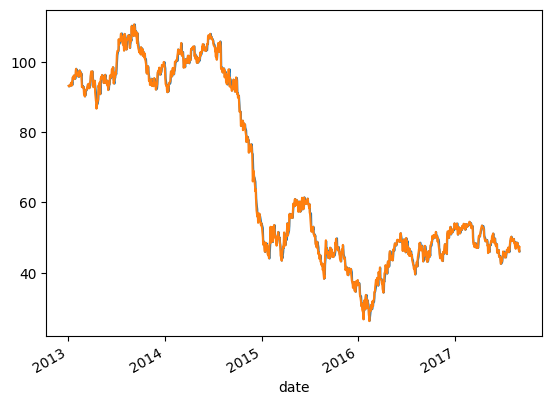

In [39]:
sarimax_model.predict().iloc[1:].plot()
oil['dcoilwtico'].plot()

In [40]:
model_stationary = ARIMA(oil['first_shift_diff'], order=(1, 0, 1)).fit()

In [41]:
model_stationary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       first_shift_diff   No. Observations:                 1175
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1900.657
Date:                Fri, 20 Oct 2023   AIC                           3809.315
Time:                        09:05:46   BIC                           3829.591
Sample:                             0   HQIC                          3816.960
                               - 1175                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0391      0.035     -1.121      0.262      -0.108       0.029
ar.L1         -0.7031      0.195     -3.613      0.000      -1.085      -0.322
ma.L1          0.6502      0.207      3.142      0.002       0.245       1.056
sigma2         1.4919      0.043     34.758      0.000       1.408       1.576
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               262.14
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.29
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

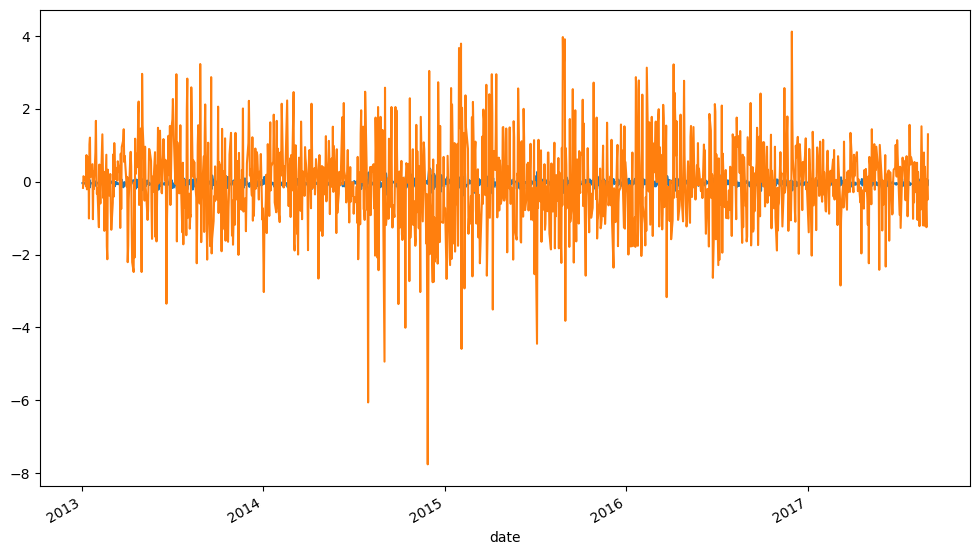

In [42]:
model_stationary.predict().plot(figsize=(12, 7))
oil['first_shift_diff'].plot(figsize=(12, 7))

In [43]:
import datetime as dt
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', FutureWarning)
forecasted_stationary = pd.Series(data={'forecasted': [model_stationary.predict(i).iloc[0] for i in range (1176, 1176+200)]}, index=pd.date_range('2017-09-1', dt.datetime(2017, 9, 1)+dt.timedelta(200), freq='D'));

In [44]:
forecasted_data = [model_stationary.predict(i).iloc[0] for i in range (1176, 1176+200)]

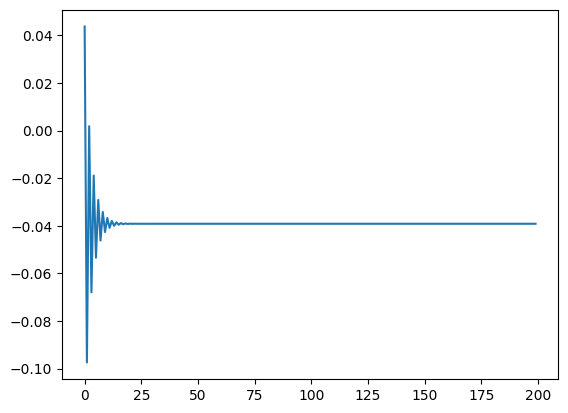

In [45]:
import matplotlib.pyplot as plt
plt.plot(forecasted_data)

In [46]:
forecasted_data

[0.043790025535109446,
 -0.09743807286460215,
 0.0018652606529448237,
 -0.0679590318174359,
 -0.018862675770860957,
 -0.05338436001241002,
 -0.029110732011532026,
 -0.04617852662439907,
 -0.034177452333548256,
 -0.042615905420272326,
 -0.03668247906433943,
 -0.04085451722814304,
 -0.03792098415701468,
 -0.03998367292963082,
 -0.038533310902166044,
 -0.03955312059844115,
 -0.03883605010368016,
 -0.03934025210953956,
 -0.03898572676709415,
 -0.039235008239550416,
 -0.03905972809714555,
 -0.039182974835135116,
 -0.03909631494191126,
 -0.039157249107115745,
 -0.03911440376827397,
 -0.039144530103053576,
 -0.03912334702755954,
 -0.039138241726522055,
 -0.03912776864591361,
 -0.03913513270326764,
 -0.03912995472911267,
 -0.039133595577501075,
 -0.03913103554599249,
 -0.039132835610325246,
 -0.039131569910433976,
 -0.03913245987652331,
 -0.03913183410445394,
 -0.03913227411075024,
 -0.03913196472407375,
 -0.039132182266678014,
 -0.03913202930345022,
 -0.039132136858239935,
 -0.039132061232006

In [48]:
from statsmodels.tsa.ar_model import AutoReg

In [56]:
ar = AutoReg(oil['dcoilwtico'], lags=).fit()

In [57]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             dcoilwtico   No. Observations:                 1175
Model:                     AutoReg(2)   Log Likelihood               -1900.125
Method:               Conditional MLE   S.D. of innovations              1.223
Date:                Fri, 20 Oct 2023   AIC                           3808.250
Time:                        09:20:57   BIC                           3828.519
Sample:                             2   HQIC                          3815.894
                                 1175                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0414      0.101      0.411      0.681      -0.156       0.239
dcoilwtico.L1     0.9372      0.029     32.145      0.000       0.880       0.994
dcoilwtico.L2     0.0615      0.029      2.111      0.035       0.004       0.119
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           +0.0000j            1.0012            0.0000
AR.2          -16.2332           +0.0000j           16.2332            0.5000
-----------------------------------------------------------------------------
"""

In [58]:
ar.predict()

date
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-07   NaN
2013-01-08   NaN
              ..
2017-08-25   NaN
2017-08-28   NaN
2017-08-29   NaN
2017-08-30   NaN
2017-08-31   NaN
Length: 1175, dtype: float64

In [59]:
# aic values?
# arima not working, why?